intra- and inter-annotator agreement calculations on ERROR SEVERITY. Steps:
1. Separate personal information+LEAP-Q from Weights+Google HTQA.
2. Separate Weights from Google evaluations.
3. Extract evaluations of Category "Yes, there are terminological errors" per annotator and system.
4. Extract from result of previous step only fully-informed errors in terminologically-flawed segment reports (i.e., the rater identified an erroneous expresion, selected a severity for the error, and provided a correction, thus filling all of the three-part error report).
5. Extract (filtering from previous step) only those segments where all annotators have informed at least one error report (which Will be fully-informed thanks to step 4). This allows us to calculate agreement on severity exclusively, not on whether or not they considered something an error, calculated in the previous notebook.
6. Calculate inter-aa scores on error severity and create plot.
7. Prepare data to calculate intra-aa on error severity (identifying segments translated identically by both systems, transposing columns and rows, rename rows according to index, merge systems' data) just like in the previous notebook for intra-aa on error category.
8. Calculate intra-aa scores on error severity and create plot.

In [ ]:
#### TO CALCULATE INTRA RATER AGREEMENT FOR SEVERITY (minor/major/nothing)
### FIRST WE EXTRACT SYSTEMS' DATA
import pandas as pd

file_path = 'rawhtqa.csv'
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 107:3507]

selected_columns.to_csv('bothsystems-data.csv', index=False)

print("Segments' data have been saved to 'bothsystems-data.csv'.")

import pandas as pd

# Load bothsystems-data.csv TO GET WEIGHTS DATA ONLY
file_path = 'bothsystems-data.csv'
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 0:1700]
selected_columns.to_csv('Weights-data.csv', index=False)

print("Weights evaluation data have been saved to 'Weights-data.csv'.")

import pandas as pd

# Load bothsystems-data.csv TO GET GOOGLE DATA ONLY
file_path = 'bothsystems-data.csv'
data = pd.read_csv(file_path)

selected_columns = data.iloc[:, 1700:3400]
selected_columns.to_csv('Google-data.csv', index=False)

print("Google evaluation data have been saved to 'Google-data.csv'.")

Segments' data have been saved to 'bothsystems-data.csv'.
Weights evaluation data have been saved to 'Weights-data.csv'.
Google evaluation data have been saved to 'Google-data.csv'.


In [2]:
### TO GET EACH RATER'S RATING OF BOTH SYSTEMS
file_path = 'bothsystems-data.csv'
data = pd.read_csv(file_path)

# Extract the header row (row 0) and column titles
header = data.iloc[0]  # First row
column_titles = data.columns  # Column titles

# Iterate over the remaining rows and save each as a new file
for i in range(1, len(data)):
    # Create a new DataFrame for each row, including the header
    row_data = pd.DataFrame([header, data.iloc[i]], columns=column_titles)

    # Save the new DataFrame to a CSV file
    output_file = f'rater_{i}_output-bothsystems.csv'
    row_data.to_csv(output_file, index=False)
    print(f"File saved: {output_file}")

File saved: rater_1_output-bothsystems.csv
File saved: rater_2_output-bothsystems.csv
File saved: rater_3_output-bothsystems.csv


In [ ]:
import pandas as pd ### TO EXTRACT ONLY "Yes, there are termin. errors" in row 2, PER RATER PER SYSTEM
### REPEAT WITH EACH RATER OUTPUT FILE rater_1_output-Weights.csv, rater_1_output-Google.csv etc ###

df = pd.read_csv('rater_1_output-bothsystems.csv', header=None)

# Define the category of interest in row index 2 (third row)
target_category = "Yes, there are terminological errors."

# Initialize an empty list to store the selected segments
selected_segments = []
count_selected_segments = 0  # Initialize a counter for the number of selected segments

# Debug: Check the first few column headers and row 2 values
print("Column headers and their values in row 2:")
for i in range(0, df.shape[1], 17):  # Check every 17th column (segment starts)
    print(f"Column {i} header: '{df.iloc[0, i]}' -> Row 2 value: '{df.iloc[2, i]}'")

# Iterate through the first column of each segment (row index 2 now)
for segment_start in range(0, df.shape[1], 17):
    # Check the value in row 2 (third row, index 2) of the current segment
    category_value = df.iloc[2, segment_start].strip()  # Remove any leading/trailing spaces
    if category_value == target_category:
        print(f"Found terminological error in segment starting at column {segment_start}.")
        # Select the entire segment (17 columns starting from segment_start)
        segment_data = df.iloc[:, segment_start:segment_start+17]
        selected_segments.append(segment_data)
        count_selected_segments += 1  # Increment the counter when a segment is selected
    else:
        print(f"Segment starting at column {segment_start} does not have the target category.")

# Check if any segments were selected
if selected_segments:
    # Combine all selected segments into a new DataFrame
    selected_df = pd.concat(selected_segments, axis=1, ignore_index=True)

    # Write the selected data to a new CSV file
    selected_df.to_csv('yestermerror_r1.csv', header=False, index=False) ### CHANGE OUTPUT FILE NAME !!!!
    print("Filtered segments have been written to 'yestermerror_r1.csv'")
    print(f"Total number of segments with terminological errors: {count_selected_segments}")
else:
    print("No segments with terminological errors were found.")

Column headers and their values in row 2:
Column 0 header: 'Are there errors in this segment?' -> Row 2 value: 'No, there are no errors at all.'
Column 17 header: 'Are there errors in this segment?.1' -> Row 2 value: 'No, there are no errors at all.'
Column 34 header: 'Are there errors in this segment?.2' -> Row 2 value: 'Yes, there are errors, but not related to terminology.'
Column 51 header: 'Are there errors in this segment?.3' -> Row 2 value: 'Yes, there are terminological errors.'
Column 68 header: 'Are there errors in this segment?.4' -> Row 2 value: 'No, there are no errors at all.'
Column 85 header: 'Are there errors in this segment?.5' -> Row 2 value: 'Yes, there are errors, but not related to terminology.'
Column 102 header: 'Are there errors in this segment?.6' -> Row 2 value: 'Yes, there are errors, but not related to terminology.'
Column 119 header: 'Are there errors in this segment?.7' -> Row 2 value: 'Yes, there are terminological errors.'
Column 136 header: 'Are there 

In [10]:
import pandas as pd ### TO EXTRACT ONLY FULLY-INFORMED ERROR REPORTS FROM ONLY "YES, TERM. ERRORS" ###
### REPEAT WITH EACH yestermerror_Weights_r1.csv, yestermerror_Weights_r2.csv, etc.

# Load the dataset with the segments where the first column identifies terminological errors
df = pd.read_csv('yestermerror_r1.csv', header=None)

# Initialize a list to store the updated segments with fully informed error reports
updated_segments = []
# Initialize a counter to keep track of how many fully informed error reports per segment
count_per_segment = []

# Define the number of error reports (5), and each error report spans 3 columns
num_error_reports = 5

# Iterate through each segment (each 17-column set)
for segment_start in range(0, df.shape[1], 17):
    segment_data = df.iloc[:, segment_start:segment_start+17]  # Select the current segment (17 columns)

    # Initialize a list to store the fully informed error reports for the current segment
    fully_informed_reports = []
    fully_informed_count = 0

    # Iterate through the 5 error reports (each consisting of 3 columns)
    for i in range(num_error_reports):
        # Extract the 3-column subset for the current error report
        error_report = segment_data.iloc[:, 1 + i*3: 4 + i*3]

        # Check if any of the 3 columns contains NaN (missing data)
        if error_report.isna().any().any():  # If there's any NaN value in the subset
            continue  # Skip this error report subset
        else:
            # If all columns are informed (no NaN values), add it to the list
            fully_informed_reports.append(error_report)
            fully_informed_count += 1

    # If there are fully informed reports, append them to the list of updated segments
    if fully_informed_reports:
        # Combine the fully informed error reports for this segment
        updated_segment = pd.concat(fully_informed_reports, axis=1, ignore_index=True)
        updated_segments.append(updated_segment)

    # Append the count of fully informed error reports for this segment
    count_per_segment.append(fully_informed_count)

    # Print the number of fully informed error reports for this segment (combine the info)
    print(f"Segment starting at column {segment_start} or segment {len(count_per_segment)} has {fully_informed_count} fully informed error report(s).")

# Combine all updated segments into a single DataFrame
if updated_segments:
    final_df = pd.concat(updated_segments, axis=1, ignore_index=True)

    # Write the final DataFrame to a new CSV file
    final_df.to_csv('clean-yestermerror_r1.csv', header=False, index=False) ### CHANGE OUTPUT FILE NAME !!!!
    print(f"Filtered segments with fully informed error reports have been written to 'clean-yestermerror_r1.csv'")
else:
    print("No fully informed error reports were found.")

# Calculate the total number of fully informed error reports
total_fully_informed = sum(count_per_segment)
# Calculate the mean and median of fully informed error reports per segment
mean_reports = pd.Series(count_per_segment).mean()
median_reports = pd.Series(count_per_segment).median()

# Print the total, mean, and median
print("\n--- Summary ---")
print(f"Total fully informed 3-part error reports: {total_fully_informed}")
print(f"Mean number of fully informed error reports per segment: {mean_reports:.2f}")
print(f"Median number of fully informed error reports per segment: {median_reports}")

Segment starting at column 0 or segment 1 has 0 fully informed error report(s).
Segment starting at column 17 or segment 2 has 1 fully informed error report(s).
Segment starting at column 34 or segment 3 has 0 fully informed error report(s).
Segment starting at column 51 or segment 4 has 1 fully informed error report(s).
Segment starting at column 68 or segment 5 has 1 fully informed error report(s).
Segment starting at column 85 or segment 6 has 2 fully informed error report(s).
Segment starting at column 102 or segment 7 has 1 fully informed error report(s).
Segment starting at column 119 or segment 8 has 1 fully informed error report(s).
Segment starting at column 136 or segment 9 has 1 fully informed error report(s).
Segment starting at column 153 or segment 10 has 1 fully informed error report(s).
Segment starting at column 170 or segment 11 has 1 fully informed error report(s).
Segment starting at column 187 or segment 12 has 1 fully informed error report(s).
Segment starting at 

In [12]:
### TO FIND INTER RATER AGREEMENT MINOR/MAJOR FOR THOSE SEGMENTS
# WHERE ALL RATERS HAVE FULLY-INFORMED AT LEAST ONE ERROR REPORT IN EACH SEGMENT (bc inter-aa on whether there was an error or not was calculated in Category agreement)
# AND NAN ARE 'NOT INFORMED', NOT MISSING VALUE
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa
import re
!pip install krippendorff
import krippendorff

files_per_rater = ["clean-yestermerror_r1.csv", "clean-yestermerror_r2.csv", "clean-yestermerror_r3.csv"]

# Load all files into a dictionary for structured access
rater_data = {f"Rater_{i+1}": pd.read_csv(file) for i, file in enumerate(files_per_rater)}

# Extract severity ratings with proper parsing of headers
def extract_severity(data):
    severity_dict = {}
    for col in data.columns:
        if "Select the severity" in col:
            match = re.search(r"Error (\d+):.*\.(\d+)", col)
            if match:
                error_num, segment_index = match.groups()
                segment_key = f"Segment_{segment_index}"
                if segment_key not in severity_dict:
                    severity_dict[segment_key] = {}
                severity_dict[segment_key][f"Error_{error_num}"] = data[col].iloc[1]
    return severity_dict

# Collect severity ratings per rater
rater_severity = {rater: extract_severity(data) for rater, data in rater_data.items()}

# Align data across raters by segment and error
all_segments = set()
all_errors = set()

for rater_segments in rater_severity.values():
    all_segments.update(rater_segments.keys())
    for segment in rater_segments:
        all_errors.update(rater_segments[segment].keys())

aligned_data = {segment: {error: [] for error in all_errors} for segment in all_segments}

for segment in all_segments:
    for error in all_errors:
        for rater in rater_severity:
            severity = rater_severity[rater].get(segment, {}).get(error, "Not Rated")
            aligned_data[segment][error].append(severity)

aligned_rows = []
for segment, errors in aligned_data.items():
    for error, ratings in errors.items():
        row = {"Segment": segment, "Error": error}
        for i, rater_rating in enumerate(ratings, start=1):
            row[f"Rater_{i}"] = rater_rating
        aligned_rows.append(row)

aligned_df = pd.DataFrame(aligned_rows)
aligned_df.to_csv("aligned_severity_data.csv", index=False)
print("Aligned severity data has been saved to 'aligned_severity_data.csv'")

# Filter segments for which ALL RATERS REPORTED AT LEAST ON ERROR
def filter_segments(df):
    filtered_segments = []
    for segment, group in df.groupby("Segment"):
        rater_cols = [col for col in group.columns if col.startswith("Rater_")]
        all_raters_reported = all(
            group[rater].str.contains("Not Rated").sum() < len(group) for rater in rater_cols
        )
        if all_raters_reported:
            filtered_segments.append(group)
    return pd.concat(filtered_segments) if filtered_segments else pd.DataFrame(columns=df.columns)

filtered_aligned_df = filter_segments(aligned_df)
filtered_aligned_df.to_csv("filtered_aligned_severity_data.csv", index=False)
print("Filtered aligned severity data has been saved to 'filtered_aligned_severity_data.csv'")



# Filtered data for inter-aa on severity calculations
filtered_data_file = "filtered_aligned_severity_data.csv"
filtered_aligned_df = pd.read_csv(filtered_data_file)

# Calculate Percent Agreement
def calculate_percent_agreement(df):
    total_items = 0
    total_agreements = 0

    rater_columns = [col for col in df.columns if col.startswith("Rater_")]
    for _, row in df.iterrows():
        ratings = [row[col] for col in rater_columns]
        if len(set(ratings)) == 1:  # All raters agree
            total_agreements += 1
        total_items += 1

    percent_agreement = (total_agreements / total_items) * 100 if total_items > 0 else 0
    return percent_agreement

percent_agreement = calculate_percent_agreement(filtered_aligned_df)
print(f"Percent agreement: {percent_agreement:.2f}%")

# Calculate Fleiss' Kappa
def severity_to_matrix(df):
    categories = ["Major", "Minor", "Not Rated"]
    kappa_matrix = []

    rater_columns = [col for col in df.columns if col.startswith("Rater_")]
    for _, row in df.iterrows():
        ratings = [row[col] for col in rater_columns]
        category_counts = [ratings.count(cat) for cat in categories]
        kappa_matrix.append(category_counts)

    return kappa_matrix, categories

kappa_matrix, categories = severity_to_matrix(filtered_aligned_df)
kappa_score = fleiss_kappa(kappa_matrix)
print(f"Fleiss' Kappa score: {kappa_score:.4f}")

# Calculate Krippendorff's Alpha
def prepare_alpha_matrix(df):
    alpha_matrix = []
    rater_columns = [col for col in df.columns if col.startswith("Rater_")]

    for _, row in df.iterrows():
        ratings = []
        for col in rater_columns:
            rating = row[col]
            if rating == "Not Rated":
                ratings.append(3)
            elif rating == "Major":
                ratings.append(2)
            elif rating == "Minor":
                ratings.append(1)
            else:
                ratings.append(0)
        alpha_matrix.append(ratings)

    return np.array(alpha_matrix)

alpha_matrix = prepare_alpha_matrix(filtered_aligned_df)
alpha_value = krippendorff.alpha(reliability_data=alpha_matrix, level_of_measurement='nominal')
print(f"Krippendorff's Alpha score: {alpha_value:.4f}")


Aligned severity data has been saved to 'aligned_severity_data.csv'
Filtered aligned severity data has been saved to 'filtered_aligned_severity_data.csv'
Percent agreement: 60.00%
Fleiss' Kappa score: 0.4357
Krippendorff's Alpha score: 0.0414


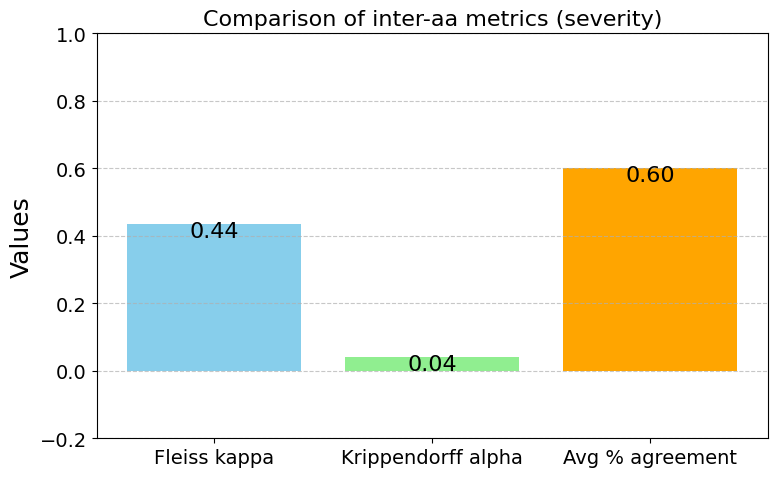

In [13]:
import matplotlib.pyplot as plt ### TO CREATE INTER RATER AGREEMENT PLOT
import numpy as np

kappa_value = 0.4357  # Paste Fleiss' Kappa value from last step
alpha_value = 0.0414  # Paste Krippendorff's Alpha
average_percent_agreement = 0.60  # Paste Percent agreement

# Labels and values
metrics = ['Fleiss kappa', 'Krippendorff alpha', 'Avg % agreement']
values = [kappa_value, alpha_value, average_percent_agreement]

# Set global font size
plt.rcParams.update({'font.size': 14})  # Adjust this value for larger/smaller text

# Create the bar graph
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'orange'])

# Annotate the bars with their values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05,
             f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=16)

# Adjust y-axis limits to focus on kappa range (-1 to 1)
plt.ylim(-0.2, 1)

# Add labels and title
plt.ylabel('Values', fontsize=18)
plt.title('Comparison of inter-aa metrics (severity)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.tight_layout()
plt.savefig('inter-aa-metrics-comparison-severity.png', dpi=300, bbox_inches='tight')  # Save the plot as a PNG file
plt.show()



In [14]:
import csv # TO PREPARE DATA TO CALCULATE INTRA-AA 1

input_file = 'Weights-data.csv'
output_file = 'identical-severity-Weights.csv'

# Segments that were identically translated by both systems, previously identified
segments_of_interest = [0, 18, 19, 27, 49, 52, 54, 69, 76, 83, 86, 87, 92, 94, 95, 99]

# Define segment and column structure
segment_length = 17  # Each segment is 17 columns long
error_start = 1      # Error reports start at the 2nd column (index 1)
error_end = 16       # Error reports end at the 16th column (index 15)

# Calculate the middle column indexes (severity) for the segments of interest
middle_columns_indexes = []
for segment in segments_of_interest:
    segment_start = segment * segment_length
    error_columns = list(range(segment_start + error_start, segment_start + error_end))
    middle_columns_indexes.extend([error_columns[i + 1] for i in range(0, len(error_columns), 3)])

# Read the input CSV and write the selected columns to the output CSV
with open(input_file, mode='r') as infile, open(output_file, mode='w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    # Read the header row
    headers = next(reader)

    # Extract headers for the middle columns
    selected_headers = [headers[i] for i in middle_columns_indexes]
    writer.writerow(selected_headers)  # Write headers to the output file

    # Process each row and extract the middle columns
    for row in reader:
        selected_row = [row[i] for i in middle_columns_indexes]
        writer.writerow(selected_row)

print(f"Severity indexes for identically translated segments have been extracted and saved to '{output_file}'.")

# Again with Google
input_file = 'Google-data.csv'
output_file = 'identical-severity-Google.csv'

segments_of_interest = [0, 18, 19, 27, 49, 52, 54, 69, 76, 83, 86, 87, 92, 94, 95, 99]

segment_length = 17
error_start = 1
error_end = 16

middle_columns_indexes = []
for segment in segments_of_interest:
    segment_start = segment * segment_length
    error_columns = list(range(segment_start + error_start, segment_start + error_end))
    middle_columns_indexes.extend([error_columns[i + 1] for i in range(0, len(error_columns), 3)])

with open(input_file, mode='r') as infile, open(output_file, mode='w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    headers = next(reader)

    selected_headers = [headers[i] for i in middle_columns_indexes]
    writer.writerow(selected_headers)

    for row in reader:
        selected_row = [row[i] for i in middle_columns_indexes]
        writer.writerow(selected_row)

print(f"Severity indexes for identically translated segments have been extracted and saved to '{output_file}'.")


Severity indexes for identically translated segments have been extracted and saved to 'identical-severity-Weights.csv'.
Severity indexes for identically translated segments have been extracted and saved to 'identical-severity-Google.csv'.


In [15]:
import pandas as pd # TO PREPARE DATA TO CALCULATE INTRA-AA 2
# TO TRANSPOSE COLUMNS TO ROWS AND THE OTHER WAY AROUND ELIMINATING NaN

file_path = 'identical-severity-Weights.csv'
data = pd.read_csv(file_path)

transposed_data = data.T

# Remove the first column (if it contains "Response", which it does)
transposed_data = transposed_data.drop(transposed_data.columns[0], axis=1)

# Drop columns where all values are NaN
#transposed_data = transposed_data.drop(transposed_data.columns[2], axis=1)  # Column 3 has index 2

# Save the cleaned transposed data
transposed_data.to_csv('transposed_identical-severity-Weights.csv', index=False)

print(transposed_data.head())
print(transposed_data.tail())


file_path = 'identical-severity-Google.csv'
data = pd.read_csv(file_path)

transposed_data = data.T

transposed_data = transposed_data.drop(transposed_data.columns[0], axis=1)

# Drop columns where all values are NaN
#transposed_data = transposed_data.drop(transposed_data.columns[2], axis=1)  # Column 3 has index 2

transposed_data.to_csv('transposed_identical-severity-Google.csv', index=False)

print(transposed_data.head())
print(transposed_data.tail())

                                              1      2    3
Error 1: Select the severity of the error.  NaN  Minor  NaN
Error 2: Select the severity of the error.  NaN    NaN  NaN
Error 3: Select the severity of the error.  NaN    NaN  NaN
Error 4: Select the severity of the error.  NaN    NaN  NaN
Error 5: Select the severity of the error.  NaN    NaN  NaN
                                                 1    2    3
Error 1: Select the severity of the error..99  NaN  NaN  NaN
Error 2: Select the severity of the error..99  NaN  NaN  NaN
Error 3: Select the severity of the error..99  NaN  NaN  NaN
Error 4: Select the severity of the error..99  NaN  NaN  NaN
Error 5: Select the severity of the error..99  NaN  NaN  NaN
                                                  1      2    3
Error 1: Select the severity of the error..100  NaN  Minor  NaN
Error 2: Select the severity of the error..100  NaN    NaN  NaN
Error 3: Select the severity of the error..100  NaN    NaN  NaN
Error 4: Select th

In [ ]:
# TO PREPARE DATA TO CALCULATE INTRA-AA 3
# TO NAME ALL FIRST COLUMNS THE SAME (ACCORDING TO INDEX, not error number, BEFORE MERGING FILES)

file_path = 'transposed_identical-severity-Weights.csv'
data = pd.read_csv(file_path)

# Replace the first column (segment names) with the index
data.reset_index(drop=True, inplace=True)

data.to_csv('updated_transposed-identical-severity-Weights.csv', index=False)
print(data.head())


file_path = 'transposed_identical-severity-Google.csv'
data = pd.read_csv(file_path)

# Replace the first column (segment names) with the index
data.reset_index(drop=True, inplace=True)

data.to_csv('updated_transposed-identical-severity-Google.csv', index=False)
print(data.head())
print(data.tail())


     1      2    3
0  NaN  Minor  NaN
1  NaN    NaN  NaN
2  NaN    NaN  NaN
3  NaN    NaN  NaN
4  NaN    NaN  NaN
     1      2    3
0  NaN  Minor  NaN
1  NaN    NaN  NaN
2  NaN    NaN  NaN
3  NaN    NaN  NaN
4  NaN    NaN  NaN
      1    2    3
75  NaN  NaN  NaN
76  NaN  NaN  NaN
77  NaN  NaN  NaN
78  NaN  NaN  NaN
79  NaN  NaN  NaN


In [17]:
# TO PREPARE DATA TO CALCULATE INTRA-AA 4
import pandas as pd # TO CHANGE COLUMN NAMES AND MERGE WEIGHTS + GOOGLE FILES

system_1_data = pd.read_csv('updated_transposed-identical-severity-Weights.csv')
system_2_data = pd.read_csv('updated_transposed-identical-severity-Google.csv')

# Check the number of columns in each system to confirm we have 3 raters
print("System 1 Data Columns:", system_1_data.shape[1])
print("System 2 Data Columns:", system_2_data.shape[1])

# Rename the columns based on the number of raters (3 raters)
column_names_system_1 = [f"System 1 Rater {i}\'s rating" for i in range(1, 4)] ### CHANGE TO 5 WITH 4 RATERS
column_names_system_2 = [f"System 2 Rater {i}\'s rating" for i in range(1, 4)] ### CHANGE TO 5 WITH 4 RATERS

# Rename the columns in the dataframes
system_1_data.columns = column_names_system_1
system_2_data.columns = column_names_system_2

# Merge the two dataframes by aligning the columns
merged_data = pd.concat([system_1_data, system_2_data], axis=1)

reordered_columns = []
for i in range(3): ### CHANGE TO 4 WITH 4 RATERS
    reordered_columns.append(f"System 1 Rater {i+1}'s rating")
    reordered_columns.append(f"System 2 Rater {i+1}'s rating")

# Apply the new column order
merged_data = merged_data[reordered_columns]

# Save the merged and reordered data
merged_data.to_csv('identical-severity-reordered_merged_file.csv', index=False)

print(merged_data.head())
print(merged_data.tail())

System 1 Data Columns: 3
System 2 Data Columns: 3
  System 1 Rater 1's rating System 2 Rater 1's rating  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

  System 1 Rater 2's rating System 2 Rater 2's rating  \
0                     Minor                     Minor   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

  System 1 Rater 3's rating System 2 Rater 3's rating  
0                       NaN                       NaN  
1                       NaN                       NaN  
2                       NaN                       NaN  
3                       NaN             

<ipython-input-18-8c806c73e300>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(value_mapping)


   System 1 Rater 1's rating  System 2 Rater 1's rating  \
0                          2                          2   
1                          2                          2   
2                          2                          2   
3                          2                          2   
4                          2                          2   

   System 1 Rater 2's rating  System 2 Rater 2's rating  \
0                          1                          1   
1                          2                          2   
2                          2                          2   
3                          2                          2   
4                          2                          2   

   System 1 Rater 3's rating  System 2 Rater 3's rating  
0                          2                          2  
1                          2                          2  
2                          2                          2  
3                          2                          2  


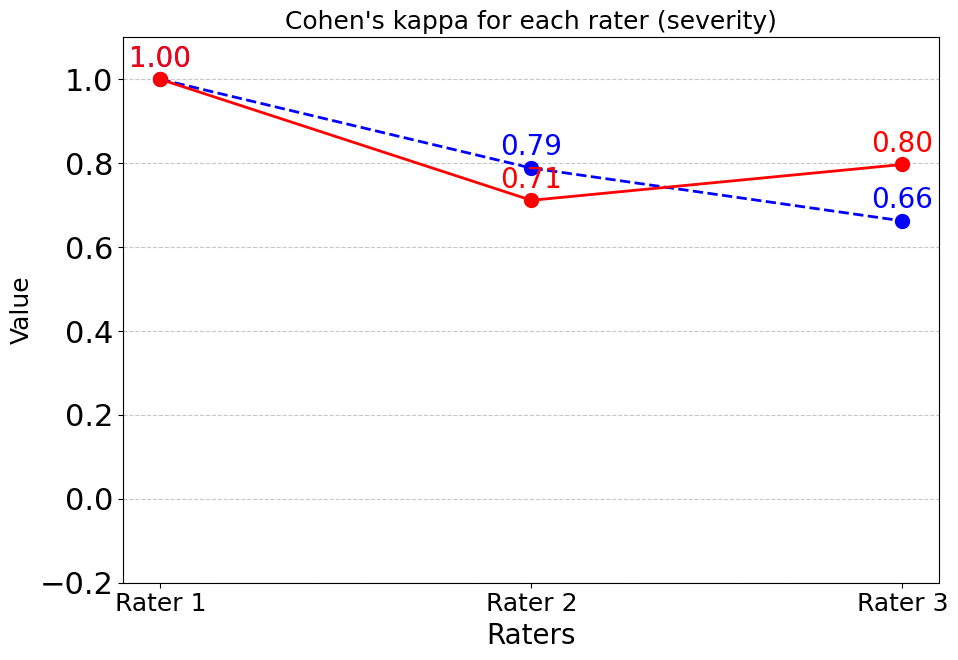

In [ ]:
import pandas as pd # TO ACTUALLY CALCULATE INTRA-AA

file_path = 'identical-severity-reordered_merged_file.csv'
data = pd.read_csv(file_path)

# Replace NaN values with a placeholder
data = data.fillna("nothing")

# Define the mapping dictionary
value_mapping = {
    "nothing": 2,  # Assign a weight 
    "Minor": 1,
    "Major": 0
}

# Apply the mapping to all columns in the dataframe
data = data.replace(value_mapping)

# Save the modified dataframe
data.to_csv('merged-mapped-identical-severity.csv', index=False)

print(data.head())

from sklearn.metrics import cohen_kappa_score # TO CALCULATE INTRA-AA WITH COHENS KAPPA

# Cohen's Kappa for Rater 1 (NOT WEIGHTED)
rater_1_system_1 = data['System 1 Rater 1\'s rating']
rater_1_system_2 = data['System 2 Rater 1\'s rating']

kappa_rater_1 = cohen_kappa_score(rater_1_system_1, rater_1_system_2)
print(f"Cohen's Kappa for Rater 1: {kappa_rater_1}")

rater_2_system_1 = data['System 1 Rater 2\'s rating']
rater_2_system_2 = data['System 2 Rater 2\'s rating']

kappa_rater_2 = cohen_kappa_score(rater_2_system_1, rater_2_system_2)
print(f"Cohen's Kappa for Rater 2: {kappa_rater_2}")

rater_3_system_1 = data['System 1 Rater 3\'s rating']
rater_3_system_2 = data['System 2 Rater 3\'s rating']

kappa_rater_3 = cohen_kappa_score(rater_3_system_1, rater_3_system_2)
print(f"Cohen's Kappa for Rater 3: {kappa_rater_3}")


# Calculate Cohen's Kappa (WEIGHTED)
kappa_weighted_linear_rater1 = cohen_kappa_score(rater_1_system_1, rater_1_system_2, weights='linear')
print(f"Weighted Cohen's Kappa (linear) for Rater 1: {kappa_weighted_linear_rater1}")

kappa_weighted_linear_rater2 = cohen_kappa_score(rater_2_system_1, rater_2_system_2, weights='linear')
print(f"Weighted Cohen's Kappa (linear) for Rater 2: {kappa_weighted_linear_rater2}")

kappa_weighted_linear_rater3 = cohen_kappa_score(rater_3_system_1, rater_3_system_2, weights='linear')
print(f"Weighted Cohen's Kappa (linear) for Rater 3: {kappa_weighted_linear_rater3}")


#TO MAKE LINE PLOT

import matplotlib.pyplot as plt

# Kappa values from the previous step
unweighted_kappas = [kappa_rater_1, kappa_rater_2, kappa_rater_3]
weighted_kappas = [kappa_weighted_linear_rater1, kappa_weighted_linear_rater2, kappa_weighted_linear_rater3]

# Rater labels
raters = ['Rater 1', 'Rater 2', 'Rater 3']

# Set global font size
plt.rcParams.update({'font.size': 20})  # Adjust this value for larger/smaller text

# Create a figure
plt.figure(figsize=(10, 7))  # Slightly larger figure for better readability

# Plot unweighted kappa (dashed lines with markers)
plt.plot(raters, unweighted_kappas, 'o--', color='blue', label='Unweighted kappa', markersize=10, linewidth=2)

# Plot weighted kappa (solid lines with markers)
plt.plot(raters, weighted_kappas, 'o-', color='red', label='Weighted kappa', markersize=10, linewidth=2)

# Add text annotations for unweighted kappa values
for i, (x, y) in enumerate(zip(raters, unweighted_kappas)):
    plt.text(i, y + 0.03, f'{y:.2f}', ha='center', fontsize=20, color='blue')

# Add text annotations for weighted kappa values
for i, (x, y) in enumerate(zip(raters, weighted_kappas)):
    plt.text(i, y + 0.03, f'{y:.2f}', ha='center', fontsize=20, color='red')

# Add labels and title
plt.ylabel("Value", fontsize=18)
plt.xlabel("Raters", fontsize=20)
plt.title("Cohen's kappa for each rater (severity)", fontsize=18)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limits to focus on kappa range
plt.ylim(-0.2, 1.1)

# Tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)

# Add legend
#plt.legend(loc='best', fontsize=22)  # Increase font size for legend

# Save the plot to a file
plt.tight_layout()
plt.savefig('intra-aa-raters-comparison-severity.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# TO CHECK OUTPUTS
import pandas as pd

file_path = 'merged-mapped-identical-severity.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Print all rows
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data)


    System 1 Rater 1's rating  System 2 Rater 1's rating  \
0                           2                          2   
1                           2                          2   
2                           2                          2   
3                           2                          2   
4                           2                          2   
5                           1                          1   
6                           2                          2   
7                           2                          2   
8                           2                          2   
9                           2                          2   
10                          2                          2   
11                          2                          2   
12                          2                          2   
13                          2                          2   
14                          2                          2   
15                          2           